# **Crafting Strategic Insights In Restaurant Ratings - Level 3**

## **Importing Necessary Libraries and importing dataset**

In [1]:
# Install pandasql
!pip install pandasql
import pandasql as psql

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=60b8917edcfecf331fee560c61bfc09696e92c8485e53db746370341d9a19c51
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


## **Read the CSV file**

In [2]:
# Upload the CSV file manually in Colab first
# Then read the CSV file into a pandas DataFrame
url= "https://raw.githubusercontent.com/LeelaYathapu/Cognifyz-Restaurant-Service-Analysis/refs/heads/main/Cleaned_Dataset.csv"
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **Task 1: Restaurant Reviews**

1. Analyze the text reviews to identify the most
common positive and negative keywords.

2. Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

In [3]:
# Write SQL query and run it in DataFrame

# SQL query to Analyze the text reviews to identify the most common positive and negative keywords
query1 = """
select distinct ("Rating text")
from df
;
"""
# Execute the SQL query
reviews_text = psql.sqldf(query1, locals())

# Show the result
print(reviews_text)

query2 = """
SELECT
    CASE
        WHEN "Rating text" IN ("Excellent","Very Good") THEN 'Positive'
        WHEN "Rating text" IN ("Average","Good") THEN 'Neutral'
        WHEN "Rating text" IN ("Poor") THEN 'Negative'
        ELSE 'Not rated'
    END AS review_feedback,
    COUNT(*) AS review_count
FROM
    df
GROUP BY
    review_feedback
ORDER BY
    review_count DESC;

"""
# Execute the SQL query
review_feedback = psql.sqldf(query2, locals())

# Show the result
print(review_feedback)

  Rating text
0   Excellent
1   Very Good
2        Good
3     Average
4   Not rated
5        Poor
  review_feedback  review_count
0         Neutral          5830
1       Not rated          2148
2        Positive          1378
3        Negative           186


Average Review Length (words): 1.3380842590651856
Correlation between review length and rating:
                  review_length  Aggregate rating
review_length          1.000000         -0.599682
Aggregate rating      -0.599682          1.000000


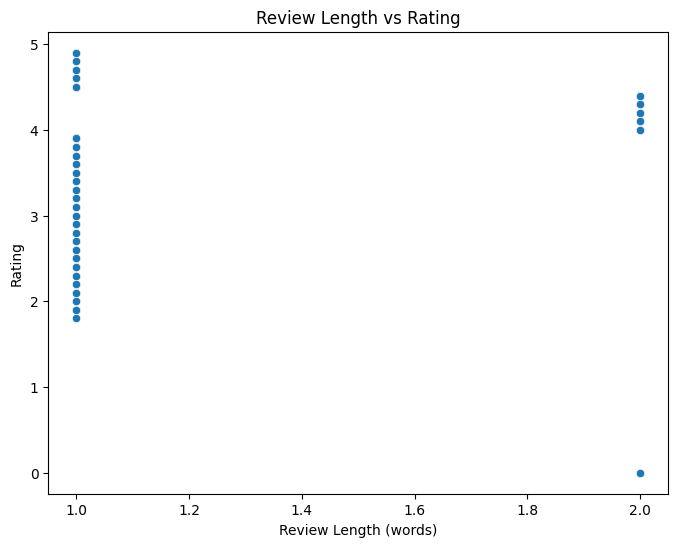

In [4]:
# SQL query to Calculate the average length of reviews and explore if there is a relationship between review length and rating.
# Step 1: Calculate the length of each review (by words)
df['review_length'] = df["Rating text"].apply(lambda x: len(str(x).split()))

# Step 2: Calculate the average length of reviews
average_review_length = df['review_length'].mean()
print(f"Average Review Length (words): {average_review_length}")

# Step 3: Explore the relationship between review length and rating
# Checking correlation between review length and rating
correlation = df[['review_length', "Aggregate rating"]].corr()

print("Correlation between review length and rating:")
print(correlation)

# Optional: Visualize the relationship between review length and rating using scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_length', y="Aggregate rating", data=df)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Rating')
plt.show()



# **Task 2: Votes Analysis**

1. Identify the restaurants with the highest and
lowest number of votes.

2. Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [5]:
# SQL query to Identify the restaurants with the highest and lowest number of votes.
query1 = """
-- Top 5 restaurants with the highest votes
SELECT
    "Restaurant Name",
    "Votes",
    "Aggregate rating"
FROM
    df
ORDER BY
    "Votes" DESC
LIMIT 5;
"""
#Bottom 5 restaurants with the lowest votes
query2 = """
SELECT
    "Restaurant Name",
    "Votes",
    "Aggregate rating"
FROM
    df
ORDER BY
    "Votes" ASC
LIMIT 5;

"""
# Execute the SQL query
highest_votes = psql.sqldf(query1, locals())
lowest_votes = psql.sqldf(query2, locals())

# Show the results
print("Top 5 restaurants with the highest votes:")
print(highest_votes)

print("\nBottom 5 restaurants with the lowest votes:")
print(lowest_votes)



Top 5 restaurants with the highest votes:
             Restaurant Name  Votes  Aggregate rating
0                       Toit  10934               4.8
1                   Truffles   9667               4.7
2           Hauz Khas Social   7931               4.3
3                  Peter Cat   7574               4.3
4  AB's - Absolute Barbecues   6907               4.6

Bottom 5 restaurants with the lowest votes:
      Restaurant Name  Votes  Aggregate rating
0    Cantinho da Gula      0               0.0
1       The Chaiwalas      0               0.0
2  Fusion Food Corner      0               0.0
3       Punjabi Rasoi      0               0.0
4       Baskin Robbin      0               0.0


In [6]:


# Calculate the correlation between Votes and Aggregate rating
votes_rating_correlation = df['Votes'].corr(df['Aggregate rating'])

# Display the correlation result
print("Correlation between Votes and Rating:", votes_rating_correlation)


Correlation between Votes and Rating: 0.3134741803250004


Votes               0
Aggregate rating    0
dtype: int64
Correlation between votes and rating:
                     Votes  Aggregate rating
Votes             1.000000          0.313474
Aggregate rating  0.313474          1.000000


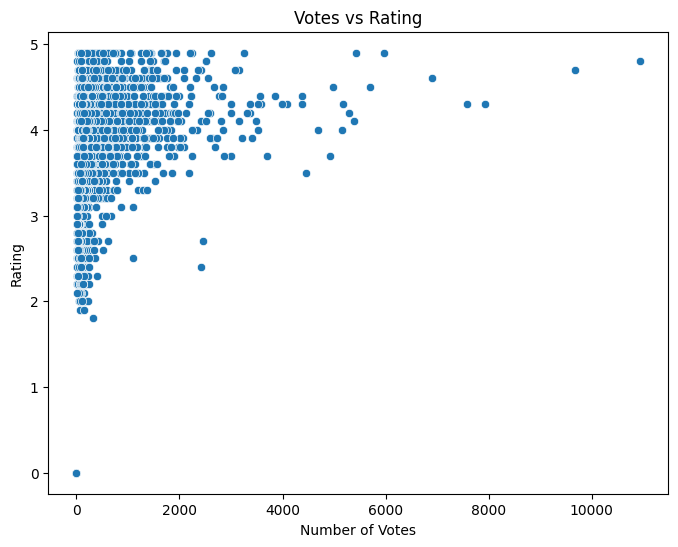

In [7]:
# SQL query to Analyze if there is a correlation between the number of votes and the rating of a restaurant.

# Step 1: Check for missing values
print(df[['Votes', "Aggregate rating"]].isnull().sum())

# drop rows with missing values in 'votes' or 'rating'
df_clean = df.dropna(subset=['Votes', "Aggregate rating"])

# Step 2: Calculate the correlation between votes and rating
correlation = df_clean[['Votes', "Aggregate rating"]].corr()
print("Correlation between votes and rating:")
print(correlation)

# Step 3: Visualize the relationship between votes and rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Votes', y="Aggregate rating", data=df_clean)
plt.title('Votes vs Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()


# **Task 3: Price Range vs. Online Delivery and Table Booking**

1. Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.

2. Determine if higher-priced restaurants are
more likely to offer these services.

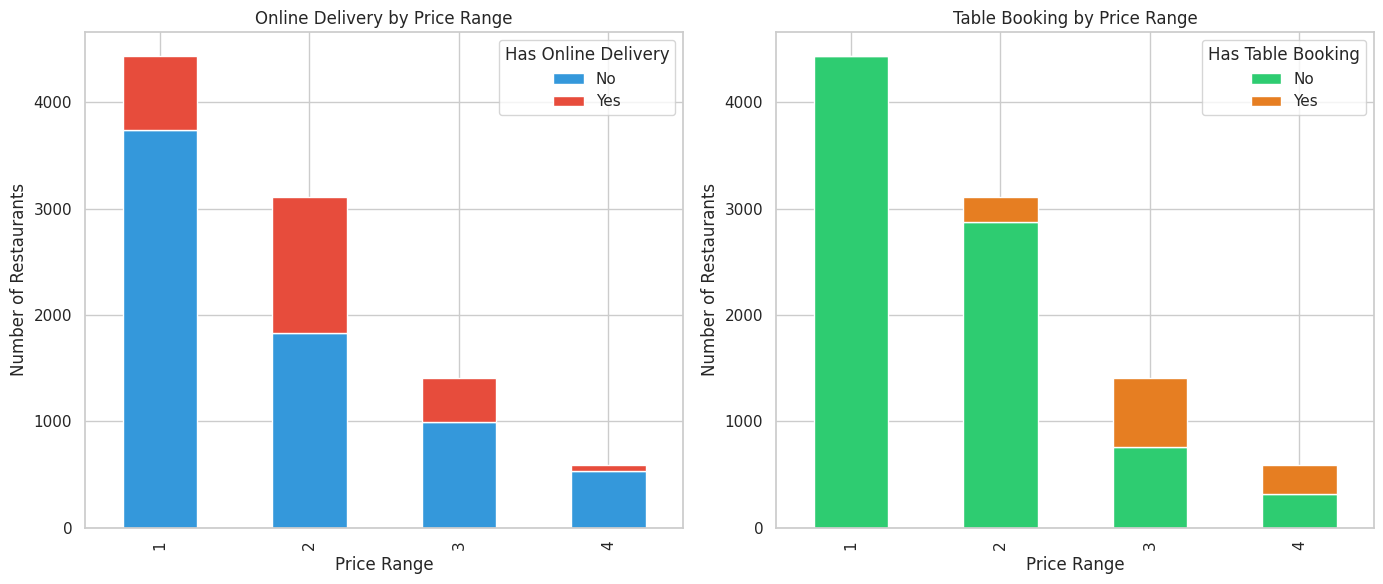

In [8]:

# Set up the style for the visualizations
sns.set(style="whitegrid")

# Group data by Price range and availability of services
online_delivery_counts = df.groupby(['Price range', 'Has Online delivery']).size().unstack()
table_booking_counts = df.groupby(['Price range', 'Has Table booking']).size().unstack()

# Plot Online Delivery by Price Range
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

online_delivery_counts.plot(kind='bar', stacked=True, ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Online Delivery by Price Range')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Number of Restaurants')
axes[0].legend(title='Has Online Delivery')

# Plot Table Booking by Price Range
table_booking_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e67e22'])
axes[1].set_title('Table Booking by Price Range')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Number of Restaurants')
axes[1].legend(title='Has Table Booking')

plt.tight_layout()
plt.show()


The charts illustrate how the availability of Online Delivery and Table Booking varies across different price ranges:

**Online Delivery**: Higher price ranges seem to have fewer restaurants offering online delivery, suggesting a potential trend where lower-cost restaurants are more likely to offer this service.

**Table Booking**: Higher-priced restaurants appear more likely to offer table booking, with the highest price ranges showing a greater proportion of this service.

In [9]:
from scipy.stats import chi2_contingency
# Use .loc to set values explicitly in the DataFrame
df.loc[:, 'Online_delivery_binary'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df.loc[:, 'Table_booking_binary'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# The rest of the code remains the same
online_delivery_corr = df['Price range'].corr(df['Online_delivery_binary'])
table_booking_corr = df['Price range'].corr(df['Table_booking_binary'])

online_delivery_contingency = pd.crosstab(df['Price range'], df['Online_delivery_binary'])
table_booking_contingency = pd.crosstab(df['Price range'], df['Table_booking_binary'])

chi2_online_delivery, p_online_delivery, _, _ = chi2_contingency(online_delivery_contingency)
chi2_table_booking, p_table_booking, _, _ = chi2_contingency(table_booking_contingency)

{
    'Online Delivery Correlation with Price Range': online_delivery_corr,
    'Table Booking Correlation with Price Range': table_booking_corr,
    'Online Delivery Chi-Square p-value': p_online_delivery,
    'Table Booking Chi-Square p-value': p_table_booking
}


{'Online Delivery Correlation with Price Range': 0.07788653076795984,
 'Table Booking Correlation with Price Range': 0.5021659712421341,
 'Online Delivery Chi-Square p-value': 9.904664515234304e-156,
 'Table Booking Chi-Square p-value': 0.0}

**Summary**

Higher-priced restaurants are indeed more likely to offer table booking, while online delivery is more common in lower to mid-price ranges. The correlations, while significant, suggest different strengths in the relationship between price range and each service.

**Here are the results of analysis:**

Correlation with Price Range:

Online Delivery: There is a weak positive correlation (0.08), suggesting that price range has a minimal effect on whether a restaurant offers online delivery.
Table Booking: A moderate positive correlation (0.50) exists, indicating that higher-priced restaurants are more likely to offer table booking.
Statistical Significance (Chi-Square Tests):

Online Delivery: The p-value is extremely low (
<
0.0001), indicating a statistically significant relationship between price range and online delivery.
Table Booking: The p-value is effectively 0, confirming a significant association between price range and table booking availability.